In [89]:
# Importing important modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [90]:
# reading the dataset
df=pd.read_csv('data/household_power_consumption.txt',sep=';',low_memory=False)
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [92]:
df.shape

(2075259, 9)

In [93]:
cols=["Global_active_power","Global_reactive_power","Voltage","Global_intensity","Sub_metering_1","Sub_metering_2","Sub_metering_3"]
df[cols]=df[cols].apply(pd.to_numeric,errors="coerce")

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


## Outlier Detection and Treatment

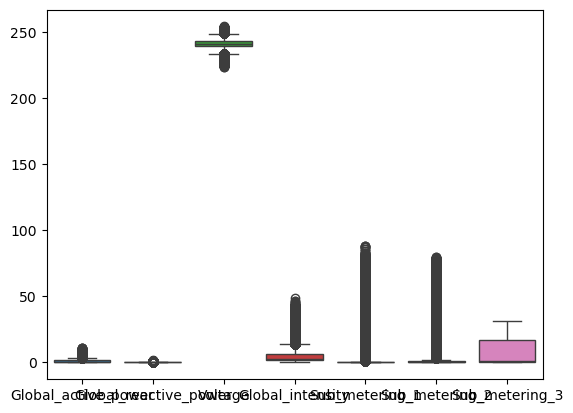

In [96]:
# Visualizing the outliers using box plot
sns.boxplot(df)
plt.show()

### IQR Treatment

In [98]:
#storing numerical columns name
num_cols=df.select_dtypes(include="number").columns
num_cols

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [99]:
# IQR method to remove outliers
Q1=df[num_cols].quantile(0.25)
Q3=df[num_cols].quantile(0.75)
IQR=Q3-Q1
UL=Q3+1.5*IQR
LL=Q1-1.5*IQR

In [100]:
mask=~((df[num_cols]<LL)|(df[num_cols]>UL)).any(axis=1)
df=df[mask]
df.shape

(1765146, 9)

## Handling missing values

In [102]:
#checking null values
df.isnull().sum()/len(df)

Date                     0.000000
Time                     0.000000
Global_active_power      0.014718
Global_reactive_power    0.014718
Voltage                  0.014718
Global_intensity         0.014718
Sub_metering_1           0.014718
Sub_metering_2           0.014718
Sub_metering_3           0.014718
dtype: float64

In [103]:
# drop null values
df=df.dropna()

In [104]:
df.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1739167 entries, 16 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 132.7+ MB


## Handling duplicate values

In [107]:
# checking for duplicate values
df.duplicated().value_counts()

False    1739167
Name: count, dtype: int64

## Modifying Features

In [109]:
# merging data and time features into one feature
df["Date_Time"]=pd.to_datetime(df["Date"]+" "+df["Time"],format = '%d/%m/%Y %H:%M:%S')

In [110]:
# drop date,time features
df.drop(columns=['Date','Time'],inplace=True)
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Date_Time
16,3.270,0.152,236.73,13.8,0.0,0.0,17.0,2006-12-16 17:40:00
18,3.266,0.000,237.13,13.8,0.0,0.0,18.0,2006-12-16 17:42:00
25,3.248,0.000,236.66,13.6,0.0,0.0,17.0,2006-12-16 17:49:00
26,3.236,0.000,235.84,13.6,0.0,0.0,17.0,2006-12-16 17:50:00
27,3.228,0.000,235.60,13.6,0.0,0.0,17.0,2006-12-16 17:51:00


In [111]:
# set date_time feature as index
df.set_index("Date_Time",inplace=True)
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date_Time,,,,,,,
2006-12-16 17:40:00,3.270,0.152,236.73,13.8,0.0,0.0,17.0
2006-12-16 17:42:00,3.266,0.000,237.13,13.8,0.0,0.0,18.0
2006-12-16 17:49:00,3.248,0.000,236.66,13.6,0.0,0.0,17.0
2006-12-16 17:50:00,3.236,0.000,235.84,13.6,0.0,0.0,17.0
2006-12-16 17:51:00,3.228,0.000,235.60,13.6,0.0,0.0,17.0


In [112]:
# creating a new feature daily average
df["Daily_avg"]=df["Global_active_power"].resample("D").transform("mean")
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Daily_avg
Date_Time,,,,,,,,
2006-12-16 17:40:00,3.270,0.152,236.73,13.8,0.0,0.0,17.0,2.285823
2006-12-16 17:42:00,3.266,0.000,237.13,13.8,0.0,0.0,18.0,2.285823
2006-12-16 17:49:00,3.248,0.000,236.66,13.6,0.0,0.0,17.0,2.285823
2006-12-16 17:50:00,3.236,0.000,235.84,13.6,0.0,0.0,17.0,2.285823
2006-12-16 17:51:00,3.228,0.000,235.60,13.6,0.0,0.0,17.0,2.285823


In [113]:
# creating a new feature rolling mean
df["Rolling_mean"]=df["Global_active_power"].rolling(60).mean()
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Daily_avg,Rolling_mean
Date_Time,,,,,,,,,
2006-12-16 17:40:00,3.270,0.152,236.73,13.8,0.0,0.0,17.0,2.285823,NaN
2006-12-16 17:42:00,3.266,0.000,237.13,13.8,0.0,0.0,18.0,2.285823,NaN
2006-12-16 17:49:00,3.248,0.000,236.66,13.6,0.0,0.0,17.0,2.285823,NaN
2006-12-16 17:50:00,3.236,0.000,235.84,13.6,0.0,0.0,17.0,2.285823,NaN
2006-12-16 17:51:00,3.228,0.000,235.60,13.6,0.0,0.0,17.0,2.285823,NaN


In [114]:
# checking for NaN values
df.isnull().sum()/len(df)

Global_active_power      0.000000
Global_reactive_power    0.000000
Voltage                  0.000000
Global_intensity         0.000000
Sub_metering_1           0.000000
Sub_metering_2           0.000000
Sub_metering_3           0.000000
Daily_avg                0.000000
Rolling_mean             0.000034
dtype: float64

In [115]:
df.dropna(inplace=True)
df.shape

(1739108, 9)

In [116]:
df["Sub_metering_1"].value_counts()

Sub_metering_1
0.0    1739108
Name: count, dtype: int64

In [117]:
df.drop('Sub_metering_1',axis=1,inplace=True)

## Seperating features and target

In [119]:
features=df.drop("Global_active_power",axis=1)
target=df["Global_active_power"]
features.head(3)

,Global_reactive_power,Voltage,Global_intensity,Sub_metering_2,Sub_metering_3,Daily_avg,Rolling_mean
Date_Time,,,,,,,
2006-12-16 21:26:00,0.060,237.17,12.6,0.0,17.0,2.285823,2.790067
2006-12-16 21:27:00,0.112,238.59,8.4,0.0,18.0,2.285823,2.766367
2006-12-16 21:30:00,0.000,237.20,13.8,0.0,18.0,2.285823,2.765700


In [120]:
target.head(3)

Date_Time
2006-12-16 21:26:00    2.878
2006-12-16 21:27:00    1.848
2006-12-16 21:30:00    3.226
Name: Global_active_power, dtype: float64

## Feature Scaling 

In [122]:
# standardizing the features
ss=StandardScaler()
features=pd.DataFrame(ss.fit_transform(features),columns=features.columns,index=features.index)
features.head()

,Global_reactive_power,Voltage,Global_intensity,Sub_metering_2,Sub_metering_3,Daily_avg,Rolling_mean
Date_Time,,,,,,,
2006-12-16 21:26:00,-0.533979,-1.426356,3.085182,-0.555626,1.392828,4.845549,3.125250
2006-12-16 21:27:00,0.010123,-0.926000,1.652778,-0.555626,1.515661,4.845549,3.087271
2006-12-16 21:30:00,-1.161788,-1.415785,3.494441,-0.555626,1.515661,4.845549,3.086202
2006-12-16 21:31:00,-1.161788,-0.989425,1.857407,-0.555626,1.392828,4.845549,3.051482
2006-12-16 21:35:00,-1.161788,-0.964760,1.720987,-0.555626,1.515661,4.845549,3.015052


In [123]:
# Saving the processed dataset as csv
df=pd.concat([features,target],axis=1)

In [124]:
df.head()

,Global_reactive_power,Voltage,Global_intensity,Sub_metering_2,Sub_metering_3,Daily_avg,Rolling_mean,Global_active_power
Date_Time,,,,,,,,
2006-12-16 21:26:00,-0.533979,-1.426356,3.085182,-0.555626,1.392828,4.845549,3.125250,2.878
2006-12-16 21:27:00,0.010123,-0.926000,1.652778,-0.555626,1.515661,4.845549,3.087271,1.848
2006-12-16 21:30:00,-1.161788,-1.415785,3.494441,-0.555626,1.515661,4.845549,3.086202,3.226
2006-12-16 21:31:00,-1.161788,-0.989425,1.857407,-0.555626,1.392828,4.845549,3.051482,1.948
2006-12-16 21:35:00,-1.161788,-0.964760,1.720987,-0.555626,1.515661,4.845549,3.015052,1.872


In [125]:
df.reset_index(inplace=True)
df.head()

,Date_Time,Global_reactive_power,Voltage,Global_intensity,Sub_metering_2,Sub_metering_3,Daily_avg,Rolling_mean,Global_active_power
0,2006-12-16 21:26:00,-0.533979,-1.426356,3.085182,-0.555626,1.392828,4.845549,3.125250,2.878
1,2006-12-16 21:27:00,0.010123,-0.926000,1.652778,-0.555626,1.515661,4.845549,3.087271,1.848
2,2006-12-16 21:30:00,-1.161788,-1.415785,3.494441,-0.555626,1.515661,4.845549,3.086202,3.226
3,2006-12-16 21:31:00,-1.161788,-0.989425,1.857407,-0.555626,1.392828,4.845549,3.051482,1.948
4,2006-12-16 21:35:00,-1.161788,-0.964760,1.720987,-0.555626,1.515661,4.845549,3.015052,1.872


In [126]:
df["Day"]=df["Date_Time"].dt.day
df["Month"]=df["Date_Time"].dt.month
df["Year"]=df["Date_Time"].dt.year
df["Hour"]=df["Date_Time"].dt.hour
df.drop("Date_Time",axis=1,inplace=True)
df.head()

,Global_reactive_power,Voltage,Global_intensity,Sub_metering_2,Sub_metering_3,Daily_avg,Rolling_mean,Global_active_power,Day,Month,Year,Hour
0,-0.533979,-1.426356,3.085182,-0.555626,1.392828,4.845549,3.125250,2.878,16,12,2006,21
1,0.010123,-0.926000,1.652778,-0.555626,1.515661,4.845549,3.087271,1.848,16,12,2006,21
2,-1.161788,-1.415785,3.494441,-0.555626,1.515661,4.845549,3.086202,3.226,16,12,2006,21
3,-1.161788,-0.989425,1.857407,-0.555626,1.392828,4.845549,3.051482,1.948,16,12,2006,21
4,-1.161788,-0.964760,1.720987,-0.555626,1.515661,4.845549,3.015052,1.872,16,12,2006,21


In [127]:
df.to_csv('data/processed_dataset.csv',index=False)